In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# copying data file path 
file_path = "/Users/aryellewright/Documents/Documents - Aryelle’s MacBook Air/Kumar-Biomaterials-Lab/Hemolysis_Plots/20231207_Hemolysis_DIP_Polyplexes.xlsx" 
sheet_name = "Sheet3"  

# reading and saving data from specific excel sheet
df = pd.read_excel(file_path, sheet_name=sheet_name)


In [19]:
# saving variables from excel sheet for plotting
polyplex = df['polyplex']
avg = df['hemolysis avg']
stdev = df['stddev']
NP_ratio = df['N/P ratio']

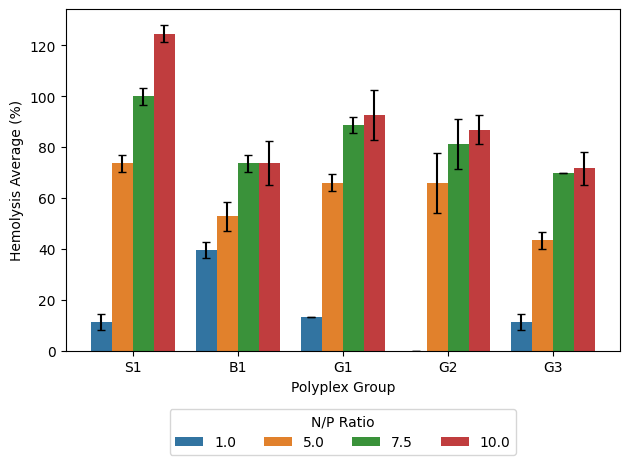

In [35]:
# plotting bars using seaborn's barplot
bar_plot = sns.barplot(data=df, x='polyplex', y='hemolysis avg', hue='N/P ratio', dodge=True)

# current axis
ax = plt.gca()

# unique categories in 'polyplex' and 'N/P ratio'
num_polyplex = len(df['polyplex'].unique())
num_ratios = len(df['N/P ratio'].unique())

# iterate through each unique 'polyplex' category
for poly_index, polyplex in enumerate(df['polyplex'].unique()):
    # filter df for each 'polyplex' category
    poly_df = df[df['polyplex'] == polyplex]

    # iterate through each 'N/P ratio' within the 'polyplex' category
    for ratio_index, (np_ratio, group_df) in enumerate(poly_df.groupby('N/P ratio')):
        # calculate x position for error bar
        # adjust position based on # of 'N/P ratios' and current index
        x = poly_index + (ratio_index - (num_ratios - 1) / 2) * 0.2  # Adjust 0.2 based on bar width

        # plot error bar
        plt.errorbar(x=x, y=group_df['hemolysis avg'].mean(), 
                     yerr=group_df['stddev'].mean(), fmt='none', c='black', capsize=3)


plt.ylabel('Hemolysis Average (%)')
plt.xlabel('Polyplex Group')
handles, labels = ax.get_legend_handles_labels()
ax.legend(title='N/P Ratio', loc='upper center', bbox_to_anchor=(0.5, -.15), ncol=num_ratios)
plt.tight_layout()
plt.show()
